In [5]:
import pandas as pd
import requests
import json
import numpy as np
from scipy import signal
from datetime import datetime

In [7]:
cpi = pd.read_csv('cpi_2000_2023.csv')
print(len(cpi))
cpi.tail(n=10)

260


,DATE,CPI
250,2022-11-01,156.608
251,2022-12-01,156.874
252,2023-01-01,157.823
253,2023-02-01,158.861
254,2023-03-01,159.582
255,2023-04-01,160.305
256,2023-05-01,160.890
257,2023-06-01,161.307
258,2023-07-01,161.492
259,2023-08-01,161.886


In [17]:
# CPI baseline (1999) is 100
# Scale CPI to baeline
cpi['CPI'] = cpi['CPI'] - 100.0
cpi.tail(n=10)

,DATE,CPI
250,2022-11-01,56.608
251,2022-12-01,56.874
252,2023-01-01,57.823
253,2023-02-01,58.861
254,2023-03-01,59.582
255,2023-04-01,60.305
256,2023-05-01,60.890
257,2023-06-01,61.307
258,2023-07-01,61.492
259,2023-08-01,61.886


In [18]:
unrate = pd.read_csv('unemployment_2000_2023.csv')
print(len(unrate))
unrate.tail(n=10)

260


,DATE,UNEMPLOYMENT
250,2022-11-01,3.6
251,2022-12-01,3.5
252,2023-01-01,3.4
253,2023-02-01,3.6
254,2023-03-01,3.5
255,2023-04-01,3.4
256,2023-05-01,3.7
257,2023-06-01,3.6
258,2023-07-01,3.5
259,2023-08-01,3.8


In [19]:
effr = pd.read_csv('effr_2000_2023.csv')
print(len(effr))
effr.tail(n=10)

278


,DATE,EFFR
268,2022-11-01,3.83
269,2022-12-01,4.33
270,2023-01-01,4.33
271,2023-02-01,4.57
272,2023-03-01,4.83
273,2023-04-01,4.83
274,2023-05-01,5.08
275,2023-06-01,5.08
276,2023-07-01,5.33
277,2023-08-01,5.33


In [20]:
print(len(cpi))
cpi.tail()

260


,DATE,CPI
255,2023-04-01,60.305
256,2023-05-01,60.890
257,2023-06-01,61.307
258,2023-07-01,61.492
259,2023-08-01,61.886


In [21]:
merged = unrate.merge(cpi, on='DATE')
merged = merged.merge(effr, on='DATE')

unrate_col = merged.pop('UNEMPLOYMENT')
effr_col = merged.pop('EFFR')

merged['UNEMPLOYMENT'] = unrate_col
merged['EFFR'] = effr_col

merged.dropna(inplace=True)
print(len(merged))
merged.tail()

254


,DATE,CPI,UNEMPLOYMENT,EFFR
249,2023-04-01,60.305,3.4,4.83
250,2023-05-01,60.890,3.7,5.08
251,2023-06-01,61.307,3.6,5.08
252,2023-07-01,61.492,3.5,5.33
253,2023-08-01,61.886,3.8,5.33


In [22]:
merged2 = pd.melt(merged, id_vars=['DATE'], var_name=['SIGNAL'], value_name='VALUE', ignore_index = False)
merged2.sort_values(by=['DATE'], inplace=True)
merged2.reset_index(drop=True, inplace=True)
print(len(merged2))
merged2.tail(n=10)

762


,DATE,SIGNAL,VALUE
752,2023-05-01,CPI,60.890
753,2023-06-01,UNEMPLOYMENT,3.600
754,2023-06-01,EFFR,5.080
755,2023-06-01,CPI,61.307
756,2023-07-01,EFFR,5.330
757,2023-07-01,CPI,61.492
758,2023-07-01,UNEMPLOYMENT,3.500
759,2023-08-01,UNEMPLOYMENT,3.800
760,2023-08-01,CPI,61.886
761,2023-08-01,EFFR,5.330


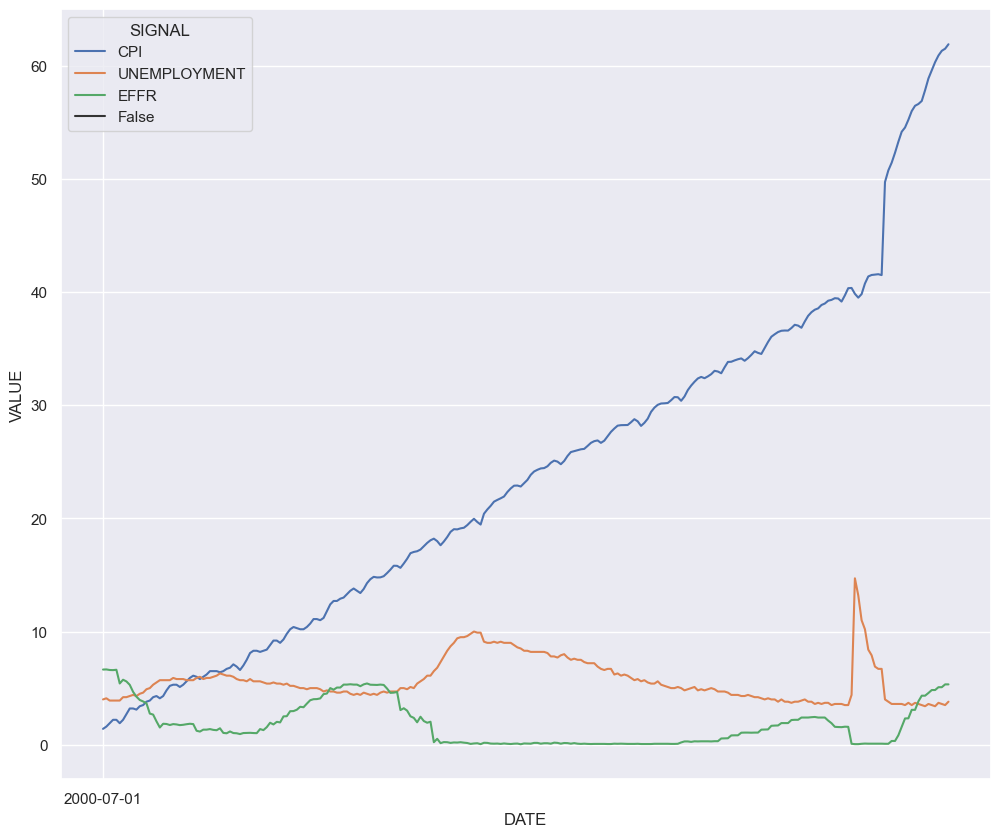

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

sns.set(rc={'figure.figsize':(12 , 10)})

sns.lineplot(data=merged2, x='DATE', y='VALUE', hue='SIGNAL', style=False, dashes=True)

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()

<Axes: xlabel='EFFR', ylabel='CPI'>

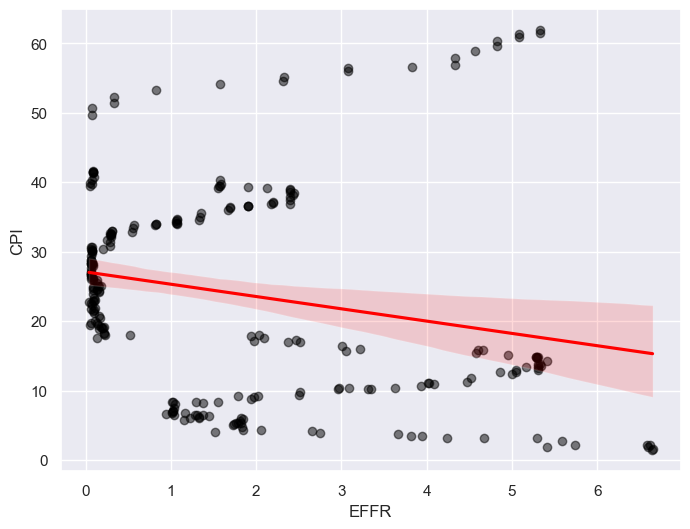

In [24]:
fig = plt.figure(figsize = (8, 6))
sns.regplot(x = merged['EFFR'], y = merged['CPI'],
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"})

In [25]:
x = merged['EFFR']
y = merged['CPI']
correlation = signal.correlate(x, y, mode="full")
lags = signal.correlation_lags(x.size, y.size, mode="full")
lag = lags[np.argmax(correlation)]
lag

-158

In [26]:
x = merged['EFFR']
y = merged['UNEMPLOYMENT']
correlation = signal.correlate(x, y, mode="full")
lags = signal.correlation_lags(x.size, y.size, mode="full")
lag = lags[np.argmax(correlation)]
lag

-35

In [27]:
x = merged['CPI']
y = merged['UNEMPLOYMENT']
correlation = signal.correlate(x, y, mode="full")
lags = signal.correlation_lags(x.size, y.size, mode="full")
lag = lags[np.argmax(correlation)]
lag

20

In [28]:
import numpy as np
from scipy import signal
rng = np.random.default_rng()
x = rng.standard_normal(1000)
y = np.concatenate([rng.standard_normal(100), x])
correlation = signal.correlate(x, y, mode="full")
lags = signal.correlation_lags(x.size, y.size, mode="full")
lag = lags[np.argmax(correlation)]
lag

-100

In [29]:
def ccf_values(series1, series2):
    p = series1
    q = series2
    p = (p - np.mean(p)) / (np.std(p) * len(p))
    q = (q - np.mean(q)) / (np.std(q))  
    c = np.correlate(p, q, 'full')
    return c
    
ccf_effr_cpi = ccf_values(merged['EFFR'], merged['CPI'])

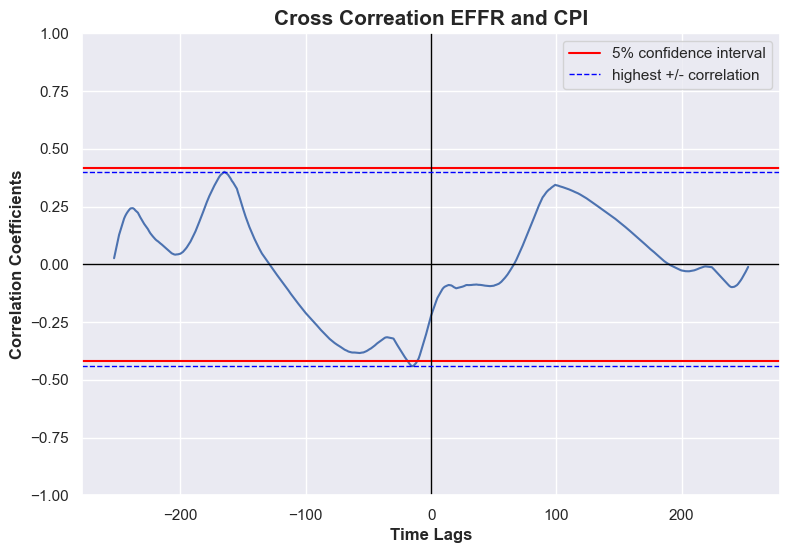

In [30]:
lags = signal.correlation_lags(len(merged['EFFR']), len(merged['CPI']))
def ccf_plot(lags, ccf):
    fig, ax = plt.subplots(figsize=(9, 6))
    ax.plot(lags, ccf)
    ax.axhline(-2/np.sqrt(23), color='red', label='5% confidence interval')
    ax.axhline(2/np.sqrt(23), color='red')
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    ax.axhline(y = np.max(ccf), color = 'blue', lw = 1, 
    linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = 'blue', lw = 1, 
    linestyle='--')
    ax.set(ylim = [-1, 1])
    ax.set_title('Cross Correation EFFR and CPI', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold', 
    fontsize = 12)
    ax.set_xlabel('Time Lags', weight='bold', fontsize = 12)
    plt.legend()
    
ccf_plot(lags, ccf_effr_cpi)

In [31]:
merged['PCT_EFFR_CHANGE'] = merged['EFFR'].pct_change()
merged['PCT_CPI_CHANGE'] = merged['CPI'].pct_change()
merged['PCT_UNEMPLOYMENT_CHANGE'] = merged['UNEMPLOYMENT'].pct_change()
merged.dropna(inplace=True)

In [32]:
merged

,DATE,CPI,UNEMPLOYMENT,EFFR,PCT_EFFR_CHANGE,PCT_CPI_CHANGE,PCT_UNEMPLOYMENT_CHANGE
1,2000-08-01,1.600,4.1,6.65,0.001506,0.142857,0.025000
2,2000-09-01,1.900,3.9,6.60,-0.007519,0.187500,-0.048780
3,2000-10-01,2.200,3.9,6.59,-0.001515,0.157895,0.000000
4,2000-11-01,2.200,3.9,6.62,0.004552,0.000000,0.000000
5,2000-12-01,1.900,3.9,5.41,-0.182779,-0.136364,0.000000
...,...,...,...,...,...,...,...
249,2023-04-01,60.305,3.4,4.83,0.000000,0.012135,-0.028571
250,2023-05-01,60.890,3.7,5.08,0.051760,0.009701,0.088235
251,2023-06-01,61.307,3.6,5.08,0.000000,0.006848,-0.027027
252,2023-07-01,61.492,3.5,5.33,0.049213,0.003018,-0.027778


In [35]:
import numpy as np

from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure
from bokeh.io import output_notebook, show

output_notebook()

TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select"

dates = np.array(merged['DATE'], dtype=np.datetime64)
effr_src = ColumnDataSource(data=dict(date=dates, rate=merged['EFFR']))
cpi_src = ColumnDataSource(data=dict(date=dates, rate=merged['CPI']))
unemp_src = ColumnDataSource(data=dict(date=dates, rate=merged['UNEMPLOYMENT']))

p = figure(height=300, sizing_mode='stretch_width', tools="xpan", toolbar_location=None,
           x_axis_type="datetime", x_axis_location="above",
           background_fill_color="#efefef", x_range=(dates[0], dates[50]),)

p.line('date', 'rate', source=effr_src, color='blue', legend_label='Federal Funds Effective Rate')
p.line('date', 'rate', source=cpi_src, color='red', legend_label='Chained CPI for All Urban Consumers')
p.line('date', 'rate', source=unemp_src, color='green', legend_label='Unemployment Rate')
p.yaxis.axis_label = 'Rate'

select = figure(title="Drag the middle and edges of the selection box to change the range above",
                height=130, width=800, y_range=p.y_range,
                x_axis_type="datetime", y_axis_type=None,
                toolbar_location=None, background_fill_color="#efefef")

range_tool = RangeTool(x_range=p.x_range)
range_tool.overlay.fill_color = "navy"
range_tool.overlay.fill_alpha = 0.2

select.line('date', 'rate', source=effr_src, color='blue')
select.line('date', 'rate', source=cpi_src, color='red')
select.line('date', 'rate', source=unemp_src, color='green')
select.ygrid.grid_line_color = None
select.add_tools(range_tool)

show(column(p, select))

Loading BokehJS ...

<Axes: xlabel='EFFR', ylabel='CPI'>

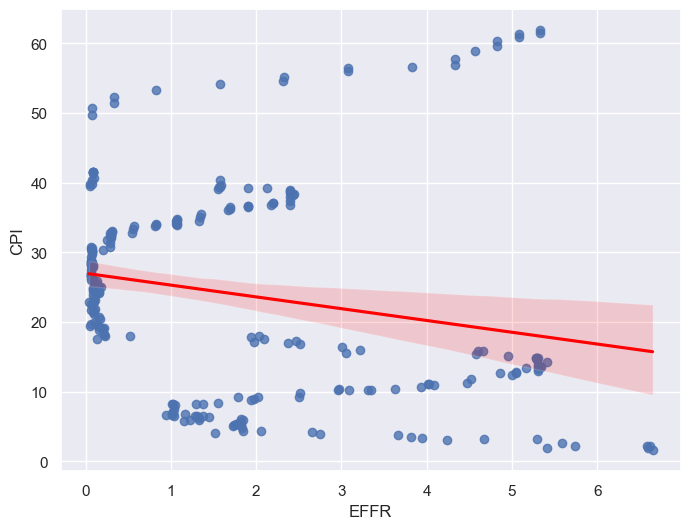

In [34]:
fig = plt.figure(figsize = (8, 6))
sns.regplot(x = merged['EFFR'], y = merged['CPI'],
#             scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"})

<Axes: xlabel='EFFR', ylabel='UNEMPLOYMENT'>

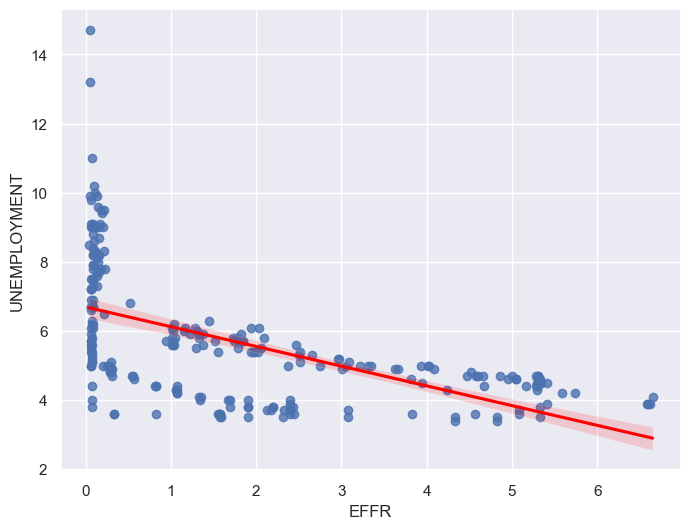

In [177]:
fig = plt.figure(figsize = (8, 6))
sns.regplot(x = merged['EFFR'], y = merged['UNEMPLOYMENT'],
#             scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"})

In [178]:
merged['EFFR'].corr(merged['CPI'])
# merged['PCT_EFFR_CHANGE'].corr(merged['PCT_CPI_CHANGE'])

-0.2864234824526276

In [179]:
merged['EFFR'].corr(merged['UNEMPLOYMENT'])

-0.5627954588620241

In [180]:
ccf_effr_cpi = ccf_values(merged['EFFR'], merged['CPI'])
# ccf_effr_cpi

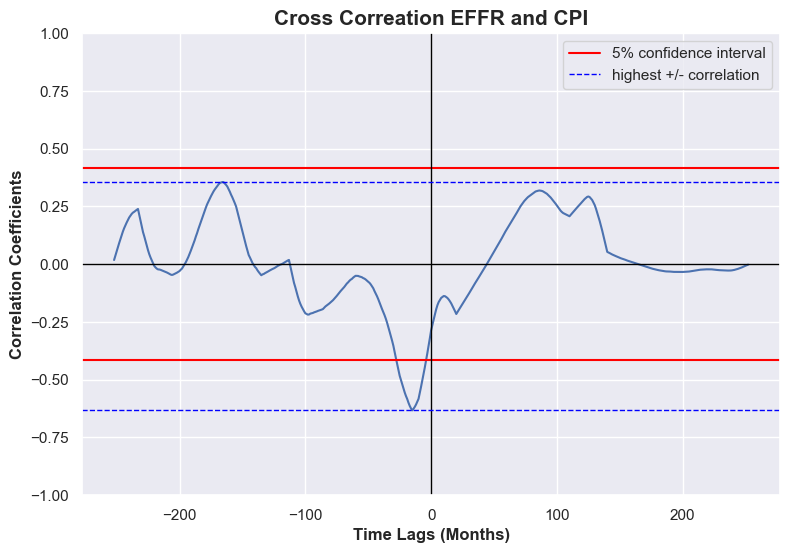

In [181]:
lags = signal.correlation_lags(len(merged['EFFR']), len(merged['CPI']))

def ccf_plot(lags, ccf):
    fig, ax =plt.subplots(figsize=(9, 6))
    ax.plot(lags, ccf)
    ax.axhline(-2/np.sqrt(23), color='red', label='5% confidence interval')
    ax.axhline(2/np.sqrt(23), color='red')
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    ax.axhline(y = np.max(ccf), color = 'blue', lw = 1, linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = 'blue', lw = 1, linestyle='--')
    ax.set(ylim = [-1, 1])
    ax.set_title('Cross Correation EFFR and CPI', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold', fontsize = 12)
    ax.set_xlabel('Time Lags (Months)', weight='bold', fontsize = 12)
    plt.legend()
    
ccf_plot(lags, ccf_effr_cpi)